In [1]:
import random
import copy
import math
import networkx as nx
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
def caldist(src,dst):
    lat1=G.nodes[src]['Latitude']  
    lon1= G.nodes[src]['Longitude']  
    lat2=G.nodes[dst]['Latitude']  
    lon2= G.nodes[dst]['Longitude']
    R = 6371 
    dLon = math.radians(lon2 - lon1)
    dLat = math.radians(lat2 - lat1 )
    a=math.sin(dLat/2) * math.sin(dLat/2) +math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = R * c
    return dist

In [3]:
def visualize(n):

    l1=[]
    for i in range(n):
        s=str(i)
        l1.append(s)
    attrs = {}
    i=0
    for node in G.nodes(data=True):
#        attrs[node[0]] = {'memory': me[i], 'processing capacity': pc[i], 'cores': co[i], 'disks': di[i]}
        me.append(G.nodes[node[0]]['memory'])
        pc.append(G.nodes[node[0]]['processing capacity'])
        co.append(G.nodes[node[0]]['cores'])
        di.append(G.nodes[node[0]]['disks'])
#    nx.set_node_attributes(G, attrs)
    attrs = {}
    for ed in G.edges(data=True):
        G[ed[0]][ed[1]][0]['weight']=caldist(ed[0],ed[1])
#    nx.set_edge_attributes(G, attrs,'weight')
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()
    
    nodes = nx.draw_networkx_nodes(G, pos=pos, ax=ax,node_size=700)
    nx.draw_networkx_edges(G, pos=pos, ax=ax)
    labels = {}    
    for node in G.nodes():
        if node in l1:
        #set the node name as the key and the label as its value 
            labels[node] = 'P'+str(node)
    nx.draw_networkx_labels(G,pos,labels)
    
    annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    idx_to_node_dict = {}
    for idx, node in enumerate(G.nodes):
        idx_to_node_dict[idx] = node
    def update_annot(ind):
        node_idx = ind["ind"][0]
        node = idx_to_node_dict[node_idx]
        xy = pos[node]
        annot.xy = xy
        node_attr = {'node': node}
        node_attr.update(G.nodes[node])
        text = '\n'.join(f'{k}: {v}' for k, v in node_attr.items())
        annot.set_text(text)

    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = nodes.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", hover)
    
    plt.show()
 #   return G

<IPython.core.display.Javascript object>


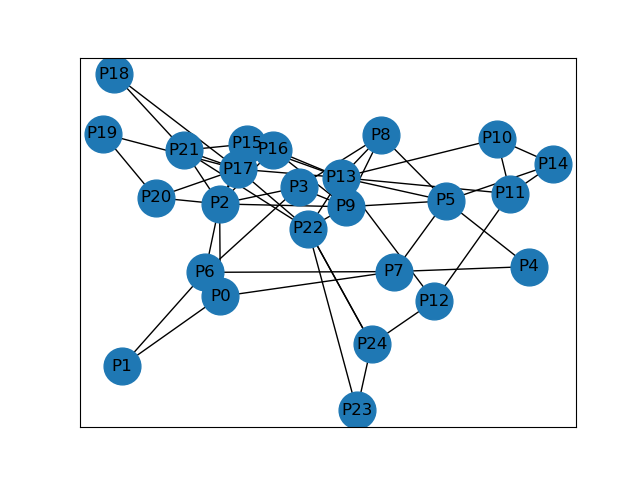

memory= [256, 512, 256, 64, 256, 128, 64, 256, 128, 256, 512, 256, 256, 128, 128, 256, 64, 256, 256, 64, 256, 256, 128, 128, 256]
processing capacity= [400, 300, 400, 400, 400, 600, 400, 500, 600, 300, 600, 500, 300, 300, 400, 300, 400, 400, 300, 600, 500, 400, 300, 300, 500]
no.of cores= [32, 64, 32, 32, 16, 32, 64, 64, 128, 128, 128, 64, 16, 128, 64, 128, 128, 64, 128, 64, 16, 16, 16, 128, 64]
disks in GB= [128, 256, 64, 512, 512, 512, 256, 256, 256, 256, 128, 512, 64, 512, 128, 512, 128, 256, 128, 512, 64, 512, 512, 256, 128]
256


In [5]:
G = nx.read_graphml('25-AttMpls.graphml')
n=G.number_of_nodes()
k=G.number_of_edges()
me=[]
pc=[]
co=[]
di=[]
nx.write_graphml(G,'25-AttMpls.graphml')
visualize(n)
print("memory=",me)
print("processing capacity=",pc)
print("no.of cores=",co)
print("disks in GB=",di)

#print((G['P'+str(u)]['P'+str(v)]['weight']/G['P'+str(u)]['P'+str(v)]['bw']))
print(G.nodes['0']['memory'])
close_centrality = nx.closeness_centrality(G)


In [6]:
def vnfdep(i,j):
    if memory[j]>ame[i]:
        return 0
    if processing_capacity[j]>apc[i]:
        return 0
    if cores[j]>aco[i]:
        return 0
    if disks[j]>adi[i]:
        return 0
    return 1

In [7]:
def reswaste(i,j):
    u=[]
    ind=[placing[b][1] for b,z in enumerate(placing) if z[0]==i]
    ume=memory[j]+me[i]-ame[i]
    upc=processing_capacity[j]+pc[i]-apc[i]
    uco=cores[j]+co[i]-aco[i]
    udi=disks[j]+di[i]-adi[i]
    
 #   print(i,j)
 #   print(ume-memory[j]," ",me[i]-ame[i])
    ume=ume/me[i]
    upc=upc/pc[i]
    uco=uco/co[i]
    udi=udi/di[i]
    utot=ume+upc+uco+udi
    
    reme=1-ume
    minre=reme
    repc=1-upc
    if(minre>repc):
        minre=repc
    reco=1-uco
    if(minre>reco):
        minre=reco
    redi=1-udi
    if(minre>redi):
        minre=redi
    retotal=(reme-minre)+(repc-minre)+(reco-minre)+(redi-minre)
    return retotal/utot

In [8]:
def place(i,j):
    ame[i]-=memory[j]
    apc[i]-=processing_capacity[j]
    aco[i]-=cores[j]
    adi[i]-=disks[j]
    placing.append([i,j])

In [24]:
def sfcreq():
    pe=[]
    
    visit=[]
    sortp=[]
#    print(nvnf)
    for i in range(n):
        y=(pc[i]/amax[i])
        pe.append([y,i])
    pe.sort(reverse=True)
    for i in range(n):
        sortp.append(pe[i][1])
    print("sorted order of server:",sortp)
#    print(len(visit))
#    print(nvnf)
    while len(visit)<nvnf:
        ra=3
        lb=len(visit)
        if (nvnf-len(visit)<ra):
            ra=nvnf-len(visit)
        d=random.sample([j for j in range(nvnf) if j not in visit],ra)
#         print(d)
        i=0
        while i<n:
            w=-1
            minrw=-1
            for j in d:
                if j not in visit:
                    if vnfdep(sortp[i],j)==1:
                 #       print(j)
                        rw=reswaste(sortp[i],j)#resource wastage
                  #      print(rw)
                        if(minrw==-1):
                            minrw=rw
                            w=j
                        elif minrw>rw:
                            minrw=rw
                            w=j
            if w!=-1:
                visit.append(w)
                place(sortp[i],w)
            #placement
            else:
                i=i+1
        if(lb==len(visit)):
            break;
#            print(i,"next")
            

In [10]:
def rand1fit():
    d=random.sample([j for j in range(nvnf)],nvnf)
    for i in d:
        w=-1
        for j in range(n):
            if vnfdep(j,i)==1:
                w=j
            if(w!=-1):
                break
        if w!=-1:
            place(w,i)
        else:
            print("error")
        

In [11]:
def firstfit():
    pe=[]
    visit=[]
    sortp=[]
    for i in range(nvnf):
        y=(cores[i])
        pe.append([y,i])
    pe.sort(reverse=True)
    for i in range(nvnf):
        sortp.append(pe[i][1])
    print("sorted order of VMs:",sortp)
    for i in sortp:
        w=-1
        for j in range(n):
            if vnfdep(j,i)==1:
                w=j
            if(w!=-1):
                break
        if w!=-1:
            place(w,i)
        else:
            print("error")       
               

In [12]:
def bestfit():
    pe=[]
    
    visit=[]
    sortp=[]
    for i in range(nvnf):
        y=(cores[i])
        pe.append([y,i])
    pe.sort(reverse=True)
    for i in range(nvnf):
        sortp.append(pe[i][1])
    print("sorted order of VMs:",sortp)
#    print(len(visit))
#    print(len(nvnf))
    i=0
    while i<nvnf:
        w=-1
        minrw=-1
        for j in range(n):
            if vnfdep(j,sortp[i])==1:
                 #       print(j)
                    rw=reswaste(j,sortp[i])#resource wastage
                  #      print(rw)
                    if(minrw==-1):
                        minrw=rw
                        w=j
                    elif minrw>rw:
                        minrw=rw
                        w=j
        if w!=-1:
            place(w,sortp[i])
            #placement
        else:
            print("error")
        i=i+1
        

In [13]:
def modbestfit():
    pe=[]
    
    visit=[]
    sortp=[]
    for i in range(nvnf):
        y=(cores[i])
        pe.append([y,i])
    pe.sort(reverse=True)
    for i in range(nvnf):
        sortp.append(pe[i][1])
    print("sorted order of VMs:",sortp)
#    print(len(visit))
#    print(len(nvnf))
    i=0
    while i<nvnf:
        w=-1
        minpow=-1
        for j in range(n):
            if vnfdep(j,sortp[i])==1:
                 #       print(j)
                    val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
                    if(val!=0):
                        val=((memory[sortp[i]]/me[j]))+((processing_capacity[sortp[i]]/pc[j]))+((cores[sortp[i]]/co[j]))+((disks[sortp[i]]/di[j]))
                        p=((amax[i]-amin[i])*val/4)
                    else:
                        val=((memory[sortp[i]]/me[j]))+((processing_capacity[sortp[i]]/pc[j]))+((cores[sortp[i]]/co[j]))+((disks[sortp[i]]/di[j]))
                        p=((amax[i]-amin[i])*val/4)
                  #      print(rw)
                    if(minpow==-1):
                        minpow=p
                        w=j
                    elif minpow>p:
                        minpow=p
                        w=j
        if w!=-1:
            place(w,sortp[i])
            #placement
        else:
            print("error")
        i=i+1
        

In [14]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
 
def minDistance(dist, sptSet):
 
        # Initialize minimum distance for next node
    mini = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
    min_index=-1
    for v in range(n):
        if dist[v] < mini and sptSet[v] == False:
            mini = dist[v]
            min_index = v
  #          print(min_index)
 
    return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
def dijkstra(src,de):
    if src>de:
        t=src
        src=de
        de=t
    dist = [1e7] * n
    dist[src] = 0
    sptSet = [False] * n
 #   print(src)
    for cout in range(n):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
        u = minDistance(dist, sptSet)
#        print(dist)
 
            # Put the minimum distance vertex in the
            # shortest path tree
        sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
        for v in range(n):
            if ((str(u),str(v)) in G.edges and (G[str(u)][str(v)][0]['weight']/G[str(u)][str(v)][0]['bw']) > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + (G[str(u)][str(v)][0]['weight']/G[str(u)][str(v)][0]['bw'])):
                dist[v] = dist[u] + (G[str(u)][str(v)][0]['weight']/G[str(u)][str(v)][0]['bw'])
 
    return dist[de]


In [15]:
def holu():
    
    rank=[]
    pl=[]
    for j in range(nvnf):
        x=[]
        for i in range(n):
            v=close_centrality[str(str(i))]
            if vnfdep(i,j)==1:
                v=v+0.1
            x.append([v,i])
        x.sort(reverse=True)
        r=[]
        q=0
        for i in range(n):
            r.append(x[i][1])
            
        rank.append(r)
#    print(rank)
#    print("sorted order of VMs:",rank)
#    print(len(visit))
#    print(len(nvnf))
    s=[]
    tm=ame6.copy()
    tp=apc6.copy()
    tc=aco6.copy()
    td=adi6.copy()
    for j in range(nvnf):
        pl.append([rank[j][0],j])
        tm[rank[j][0]]-=memory[j]
        tp[rank[j][0]]-=processing_capacity[j]
        tc[rank[j][0]]-=cores[j]
        td[rank[j][0]]-=disks[j]
        s.append(0)
        
    x=0
#    print(pl)
    ex=[]
    for i in range(n):
        if(tm[i]<0 or tp[i]<0 or tc[i]<0 or td[i]<0):
            x=1
            ex.append(i)
    while x==1:
        #print("break")
        dist=[]
        di2=[]
        tm=ame6.copy()
        tp=apc6.copy()
        tc=aco6.copy()
        td=adi6.copy()
        re=[]
        k=a
        l=rank[0][s[0]]
        dist.append(dijkstra(k,l))
        for j in range(nvnf):
            k=rank[j][s[j]]
            if (j+1)!=nvnf:
                l=rank[j+1][s[j+1]]
            else:
                l=b
            dist.append(dijkstra(k,l))
            if k in ex:
                re.append(j);
        k=-1
 #       print(dist)
        for j in range(nvnf):
            if len(re)==0 or (j in re):
                di2.append([dist[j]+dist[j+1],j])
        di2.sort(reverse=True)
        l=0
  #      print(di2)
        while(k==-1):
            if(s[di2[l][1]]<(n-1)):
                k=0
            else:
                l+=1
   #     print(l)
        s[di2[l][1]]+=1;
    #    print(s)
        pl.clear()
        ex.clear()
        for j in range(nvnf):
            pl.append([rank[j][s[j]],j])
            tm[rank[j][s[j]]]-=memory[j]
            tp[rank[j][s[j]]]-=processing_capacity[j]
            tc[rank[j][s[j]]]-=cores[j]
            td[rank[j][s[j]]]-=disks[j]
        
        x=0
        for i in range(n):
            if(tm[i]<0 or tp[i]<0 or tc[i]<0 or td[i]<0):
                x=1
                ex.append(i)
     #   print(pl)
    for j in range(nvnf):
        place(rank[j][s[j]],j)        
        
    

In [16]:
def delay(pl):
    pl.sort(key=lambda x:x[1])
    k=a
    l=pl[0][0]
    dist=dijkstra(k,l)
#    print(dist)
    for j in range(nvnf):
        k=pl[j][0]
        if (j+1)!=nvnf:
            l=pl[j+1][0]
        else:
            l=b
        dist+=dijkstra(k,l)
#        print(dist)
    return dist

In [17]:
def ut(x,i):
    y=0
#    print(me[i],pc[i],co[i],di[i],i)
    for j in range(nvnf):
        val=(memory[j]/ame[i])+(processing_capacity[j]/apc[i])+(cores[j]/aco[i])+(disks[j]/adi[i])
        y+=x[i][j]*(val)
    return y

In [18]:
def mini(x,y):
    return (a>b)*b+(b>a)*a

In [19]:
def rw(x,i):
    r=0
    ume=0
    upc=0
    uco=0
    udi=0
    print("NP")
    
    for j in range(nvnf):
        ume+=(x[i][j]*memory[j]/ame[i])
        upc+=x[i][j]*processing_capacity[j]/apc[i]
        uco+=x[i][j]*cores[j]/aco[i]
        udi+=x[i][j]*disks[j]/adi[i]
 #   print(type(utot))
    utot=ume+upc+uco+udi
 #   print(type(ume))
    reme=1-ume
    minre=reme
    
    repc=1-upc
    minre=mini(repc,minre)
#    if(repc-minre<=0):
#        minre=repc
    reco=1-uco
    minre=mini(reco,minre)
#    if(-1<=(reco-minre)<=0):
#        minre=reco
    redi=1-udi
    minre=mini(redi,minre)
#    print(reme,repc,reco,redi)
#    if(-1<=(redi-minre)<=0):
#        minre=redi

    retotal=(reme-minre)+(repc-minre)+(reco-minre)+(redi-minre)
  #  print(utot,"\n",type(utot.getValue()))
 #   utot=1

    return retotal/(utot)

In [20]:
def opti():
    import gurobipy as gp
    from gurobipy import GRB
    try:

    # Create a new model
        m = gp.Model("mip1")

    # Create variables
        x=[]
        print(me)
        print(pc)
        print(co)
        print(di)
        for i in range(n):
            a=[]
            for j in range(nvnf):
                a.append(m.addVar(0,1,vtype=GRB.INTEGER, name="X"+str(i)+str(j)))
            x.append(a)
        
        ptot=gp.quicksum((amin+(amax-amin)*ut(x,i))for i in range(n))
        rtot=gp.quicksum((rw(x,i))for i in range(n))
        m.setObjective(rtot, GRB.MINIMIZE)
        print("DONE")
    # Add constraint: x + 2 y + 3 z <= 4
        for j in range(nvnf):
            m.addConstr(gp.quicksum(x[i][j] for i in range(n))==1, "c"+str(j))
        l=nvnf
        for i in range(n):
            m.addConstr(gp.quicksum(x[i][j]*memory[j] for j in range(nvnf))<=me[i], "c"+str(l))
            l=l+1
            m.addConstr(gp.quicksum(x[i][j]*processing_capacity[j] for j in range(nvnf))<=pc[i], "c"+str(l))
            l=l+1
            m.addConstr(gp.quicksum(x[i][j]*cores[j] for j in range(nvnf))<=co[i], "c"+str(l))
            l=l+1
            m.addConstr(gp.quicksum(x[i][j]*disks[j] for j in range(nvnf))<=di[i], "c"+str(l))
            l=l+1
        m.optimize()

        for v in m.getVars():
            print('%s %g' % (v.varName, v.x))

        print('Obj: %g' % m.objVal)

    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))

    except AttributeError:
        print('Encountered an attribute error')

In [21]:
def reswa(i,k):
    if k==1:
        ume=(me[i]-ame1[i])/me[i]
        upc=(pc[i]-apc1[i])/pc[i]
        uco=(co[i]-aco1[i])/co[i]
        udi=(di[i]-adi1[i])/di[i]
    if k==2:
        ume=(me[i]-ame2[i])/me[i]
        upc=(pc[i]-apc2[i])/pc[i]
        uco=(co[i]-aco2[i])/co[i]
        udi=(di[i]-adi2[i])/di[i]
    if k==3:
        ume=(me[i]-ame3[i])/me[i]
        upc=(pc[i]-apc3[i])/pc[i]
        uco=(co[i]-aco3[i])/co[i]
        udi=(di[i]-adi3[i])/di[i]
    if k==4:
        ume=(me[i]-ame4[i])/me[i]
        upc=(pc[i]-apc4[i])/pc[i]
        uco=(co[i]-aco4[i])/co[i]
        udi=(di[i]-adi4[i])/di[i]
    if k==5:
        ume=(me[i]-ame5[i])/me[i]
        upc=(pc[i]-apc5[i])/pc[i]
        uco=(co[i]-aco5[i])/co[i]
        udi=(di[i]-adi5[i])/di[i]
    if k==6:
        ume=(me[i]-ame6[i])/me[i]
        upc=(pc[i]-apc6[i])/pc[i]
        uco=(co[i]-aco6[i])/co[i]
        udi=(di[i]-adi6[i])/di[i]
    utot=1
    utot=ume+upc+uco+udi
    reme=1-ume
    minre=reme
    repc=1-upc
    if(minre>repc):
        minre=repc
    reco=1-uco
    if(minre>reco):
        minre=reco
    redi=1-udi
    if(minre>redi):
        minre=redi
    retotal=(reme-minre)+(repc-minre)+(reco-minre)+(redi-minre)
    
    return retotal/utot

In [28]:
def results(nsfc):
    act1=0
    cpu1=0
    mem1=0
    rsw1=0
    po1=0
    act2=0
    cpu2=0
    mem2=0
    rsw2=0
    po2=0
    act3=0
    cpu3=0
    mem3=0
    rsw3=0
    po3=0
    act4=0
    cpu4=0
    mem4=0
    rsw4=0
    po4=0
    act5=0
    cpu5=0
    mem5=0
    rsw5=0
    po5=0
    act6=0
    cpu6=0
    mem6=0
    rsw6=0
    po6=0
    
    for i in range(n):
       # print(amin[i])
        off=amin[i]
        cpu1+=1-(aco1[i]/co[i])
        mem1+=1-(ame1[i]/me[i])
        val=((1-(ame1[i]/me[i]))+(1-(apc1[i]/pc[i]))+(1-(aco1[i]/co[i]))+(1-(adi1[i]/di[i])))/4
        if(val!=0):
            act1=act1+1
            rsw1+=reswa(i,1)
            po1+=(amin[i]+(amax[i]-amin[i])*val)
        else:
            po1+=off
        cpu2+=1-(aco2[i]/co[i])
        mem2+=1-(ame2[i]/me[i])
        val=((1-(ame2[i]/me[i]))+(1-(apc2[i]/pc[i]))+(1-(aco2[i]/co[i]))+(1-(adi2[i]/di[i])))/4
        if(val!=0):
            act2=act2+1
            rsw2+=reswa(i,2)
            po2+=(amin[i]+(amax[i]-amin[i])*val)
        else:
            po2+=off
        cpu3+=1-(aco3[i]/co[i])
        mem3+=1-(ame3[i]/me[i])
        val=((1-(ame3[i]/me[i]))+(1-(apc3[i]/pc[i]))+(1-(aco3[i]/co[i]))+(1-(adi3[i]/di[i])))/4
        if(val!=0):
            act3=act3+1
            rsw3+=reswa(i,3)
            po3+=(amin[i]+(amax[i]-amin[i])*val)
        else:
            po3+=off
        cpu4+=1-(aco4[i]/co[i])
        mem4+=1-(ame4[i]/me[i])
        val=((1-(ame4[i]/me[i]))+(1-(apc4[i]/pc[i]))+(1-(aco4[i]/co[i]))+(1-(adi4[i]/di[i])))/4
        if(val!=0):
            act4=act4+1
            rsw4+=reswa(i,4)
            po4+=(amin[i]+(amax[i]-amin[i])*val)
        else:
            po4+=off
        cpu5+=1-(aco5[i]/co[i])
        mem5+=1-(ame5[i]/me[i])
        val=((1-(ame5[i]/me[i]))+(1-(apc5[i]/pc[i]))+(1-(aco5[i]/co[i]))+(1-(adi5[i]/di[i])))/4
        if(val!=0):
            act5=act5+1
            rsw5+=reswa(i,5)
            po5+=(amin[i]+(amax[i]-amin[i])*val)
        else:
            po5+=off
        cpu6+=1-(aco6[i]/co[i])
        mem6+=1-(ame6[i]/me[i])
        val=((1-(ame6[i]/me[i]))+(1-(apc6[i]/pc[i]))+(1-(aco6[i]/co[i]))+(1-(adi6[i]/di[i])))/4
        if(val!=0):
            act6=act6+1
            rsw6+=reswa(i,6)
            po6+=(amin[i]+(amax[i]-amin[i])*val)
        else:
            po6+=off
    print("parameters\t\tour result\trand 1st fit\t1st fit   \tbest fit\tmodified \tholu")
    print("active phy servers\t",act1,"\t\t",act2,"\t\t",act3,"\t\t",act4,"\t\t",act5,"\t\t",act6)
    print("CPU utilization  \t",round(cpu1/act1,6),"\t",round(cpu2/act2,6),"\t",round(cpu3/act3,6),"\t",round(cpu4/act4,6),"\t",round(cpu5/act5,6),"\t",round(cpu6/act6,6))
    print("memory utilization\t",round(mem1/act1,6),"\t",round(mem2/act2,6),"\t",round(mem3/act3,6),"\t",round(mem4/act4,6),"\t",round(mem5/act5,6),"\t",round(mem6/act6,6))
    print("power consumption\t",round(po1,6),"\t",round(po2,6),"\t",round(po3,6),"\t",round(po4,6),"\t",round(po5,6),"\t",round(po6,6))
    print("resource wastage\t",round(rsw1/act1,6),"\t",round(rsw2/act2,6),"\t",round(rsw3/act3,6),"\t",round(rsw4/act4,6),"\t",round(rsw5/act5,6),"\t",round(rsw6/act6,6))
    print("delays of requests \t",round(dly1,6),"\t",round(dly2,6),"\t",round(dly3,6),"\t",round(dly4,6),"\t",round(dly5,6),"\t",round(dly6,6))
    a1.append(act1)
    c1.append(round(cpu1/act1,6))
    m1.append(round(mem1/act1,6))
    p1.append(round(po1,6))
    r1.append(round(rsw1/act1,6))
    d1.append(round(dly1,6))
    a2.append(act2)
    c2.append(round(cpu2/act2,6))
    m2.append(round(mem2/act2,6))
    p2.append(round(po2,6))
    r2.append(round(rsw2/act2,6))
    d2.append(round(dly2,6))
    a3.append(act3)
    c3.append(round(cpu3/act3,6))
    m3.append(round(mem3/act3,6))
    p3.append(round(po3,6))
    r3.append(round(rsw3/act3,6))
    d3.append(round(dly3,6))
    a4.append(act4)
    c4.append(round(cpu4/act4,6))
    m4.append(round(mem4/act4,6))
    p4.append(round(po4,6))
    r4.append(round(rsw4/act4,6))
    d4.append(round(dly4,6))
    a5.append(act5)
    c5.append(round(cpu5/act5,6))
    m5.append(round(mem5/act5,6))
    p5.append(round(po5,6))
    r5.append(round(rsw5/act5,6))
    d5.append(round(dly5,6))
    a6.append(act6)
    c6.append(round(cpu6/act6,6))
    m6.append(round(mem6/act6,6))
    p6.append(round(po6,6))
    r6.append(round(rsw6/act6,6))
    d6.append(round(dly6,6))

In [30]:
##### off = int(input("Off power: ")) 
#amin = int(input("idle power: "))
#amax = int(input("full power: ")) 
#off=50
#amin=200
#amax=500
import fileinput
# Using fileinput.input() method
f1=fileinput.input(files ='gfg.txt')
f=[]
for i in f1:
    x = i.split()
    for j in x:
        f.append(int(j))
f1.close()
a1=[]
c1=[]
m1=[]
r1=[]
p1=[]
d1=[]
a2=[]
c2=[]
m2=[]
r2=[]
p2=[]
d2=[]
a3=[]
c3=[]
m3=[]
r3=[]
p3=[]
d3=[]
a4=[]
c4=[]
m4=[]
r4=[]
p4=[]
d4=[]
a5=[]
c5=[]
m5=[]
r5=[]
p5=[]
d5=[]
a6=[]
c6=[]
m6=[]
r6=[]
p6=[]
d6=[]
qe=0;
for i in range(1,7):
    #nsfc = int(input("no.of sfc requests: "))
    nsfc=f[qe]
    qe+=1
    ame1=me.copy()
    apc1=pc.copy()
    aco1=co.copy()
    adi1=di.copy()
    ame2=me.copy()
    apc2=pc.copy()
    aco2=co.copy()
    adi2=di.copy()
    ame3=me.copy()
    apc3=pc.copy()
    aco3=co.copy()
    adi3=di.copy()
    ame4=me.copy()
    apc4=pc.copy()
    aco4=co.copy()
    adi4=di.copy()
    ame5=me.copy()
    apc5=pc.copy()
    aco5=co.copy()
    adi5=di.copy()
    ame6=me.copy()
    apc6=pc.copy()
    aco6=co.copy()
    adi6=di.copy()
    dly1=0
    dly2=0
    dly3=0
    dly4=0
    dly5=0
    dly6=0
    amin=[]
    amax=[]
    for i in range(n):
        #t=100*random.choice(range(2,4))
        amin.append(f[qe])
        amax.append(f[qe]+200)
        qe+=1
#    print(amin)
    for x in range(nsfc):
        placing=[]
        placing2=[]
        a=f[qe]
        qe+=1
        b=f[qe]
        qe+=1
        print(a,b)
        nvnf=f[qe]
        qe+=1
#    maxdelay=int(input("Max Delay: "))
        memory=[]
        processing_capacity=[]
        cores=[]
        disks=[]
    
        ame=ame1.copy()
        apc=apc1.copy()
        aco=aco1.copy()
        adi=adi1.copy()
        for i in range(nvnf):
            memory.append(f[qe])
            qe+=1
            processing_capacity.append(f[qe])
            qe+=1
            cores.append(f[qe])
            qe+=1
            disks.append(f[qe])
            qe+=1
            print("Memory of vnf "+str(i)+": "+str(memory[i]))
            print("processing capacity of vnf "+str(i)+": "+str(processing_capacity[i]))
            print("no.of cores of vnf "+str(i)+": "+str(cores[i]))
            print("no.of disks of vnf "+str(i)+": "+str(disks[i]))
        sfcreq()
        print("placement of jth vnf on ith server as [i,j]:\n",placing)
        dly1+=delay(placing)
        power=0
        po=0
        for i in range(n):
            y=0
            val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
            po+=(amin[i]+(amax[i]-amin[i])*val/4)
        print("our result:",po)
        placing.clear()
        ame1=ame.copy()
        apc1=apc.copy()
        aco1=aco.copy()
        adi1=adi.copy()
        
        ame=ame2.copy()
        apc=apc2.copy()
        aco=aco2.copy()
        adi=adi2.copy()
        rand1fit()
        print("placement of jth vnf on ith server as [i,j]:\n",placing)
        dly2+=delay(placing)
        power=0
        po=0
        for i in range(n):
            y=0
            val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
            po+=(amin[i]+(amax[i]-amin[i])*val/4)
        print("rand 1st fit result:",po)
        ame2=ame.copy()
        apc2=apc.copy()
        aco2=aco.copy()
        adi2=adi.copy()
        placing.clear()
        ame=ame3.copy()
        apc=apc3.copy()
        aco=aco3.copy()
        adi=adi3.copy()
        firstfit()
        print("placement of jth vnf on ith server as [i,j]:\n",placing)
        dly3+=delay(placing)
        power=0
        po=0
        for i in range(n):
            y=0
            val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
            po+=(amin[i]+(amax[i]-amin[i])*val/4)
        print("1st fit decreasing result:",po)
        ame3=ame.copy()
        apc3=apc.copy()
        aco3=aco.copy()
        adi3=adi.copy()
        placing.clear()
        ame=ame4.copy()
        apc=apc4.copy()
        aco=aco4.copy()
        adi=adi4.copy()
        bestfit()
        print("placement of jth vnf on ith server as [i,j]:\n",placing)
        dly4+=delay(placing)
        power=0
        po=0
        for i in range(n):
            y=0
            val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
            po+=(amin[i]+(amax[i]-amin[i])*val/4)
        print("best fit decreasing result:",po)
        ame4=ame.copy()
        apc4=apc.copy()
        aco4=aco.copy()
        adi4=adi.copy()
        placing.clear()
        ame=ame5.copy()
        apc=apc5.copy()
        aco=aco5.copy()
        adi=adi5.copy()
        modbestfit()
        print("placement of jth vnf on ith server as [i,j]:\n",placing)
        dly5+=delay(placing)
        power=0
        po=0
        for i in range(n):
            y=0
            val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
            po+=(amin[i]+(amax[i]-amin[i])*val/4)
        print("modified best fit decreasing result:",po)
        ame5=ame.copy()
        apc5=apc.copy()
        aco5=aco.copy()
        adi5=adi.copy()
        placing.clear()
        ame=ame6.copy()
        apc=apc6.copy()
        aco=aco6.copy()
        adi=adi6.copy()
    
        holu()
        print("placement of jth vnf on ith server as [i,j]:\n",placing)
        dly6+=delay(placing)
        power=0
        po=0
        for i in range(n):
            y=0
            val=(1-(ame[i]/me[i]))+(1-(apc[i]/pc[i]))+(1-(aco[i]/co[i]))+(1-(adi[i]/di[i]))
            po+=(amin[i]+(amax[i]-amin[i])*val/4)
       # print(ame[i],apc[i],aco[i],adi[i])
        print("holu:",po)
        ame6=ame.copy()
        apc6=apc.copy()
        aco6=aco.copy()
        adi6=adi.copy()
    results(nsfc)
   # ame=me.copy()
   # apc=pc.copy()
   # aco=co.copy()
   # adi=di.copy()
   # placing=[]
   # sfcreq2()
   # print(placing)
  #  opti()

21 24
Memory of vnf 0: 64
processing capacity of vnf 0: 200
no.of cores of vnf 0: 4
no.of disks of vnf 0: 64
Memory of vnf 1: 16
processing capacity of vnf 1: 200
no.of cores of vnf 1: 16
no.of disks of vnf 1: 64
Memory of vnf 2: 16
processing capacity of vnf 2: 200
no.of cores of vnf 2: 16
no.of disks of vnf 2: 64
Memory of vnf 3: 16
processing capacity of vnf 3: 300
no.of cores of vnf 3: 16
no.of disks of vnf 3: 16
Memory of vnf 4: 64
processing capacity of vnf 4: 200
no.of cores of vnf 4: 8
no.of disks of vnf 4: 64
Memory of vnf 5: 16
processing capacity of vnf 5: 300
no.of cores of vnf 5: 8
no.of disks of vnf 5: 16
sorted order of server: [8, 19, 10, 5, 24, 21, 20, 17, 16, 14, 11, 7, 6, 4, 3, 2, 0, 22, 15, 9, 1, 23, 18, 13, 12]
placement of jth vnf on ith server as [i,j]:
 [[8, 1], [8, 4], [19, 3], [8, 2], [19, 5], [10, 0]]
our result: 6686.979166666666
placement of jth vnf on ith server as [i,j]:
 [[0, 3], [1, 0], [2, 1], [3, 5], [4, 4], [5, 2]]
rand 1st fit result: 6817.1875
sort

<IPython.core.display.Javascript object>


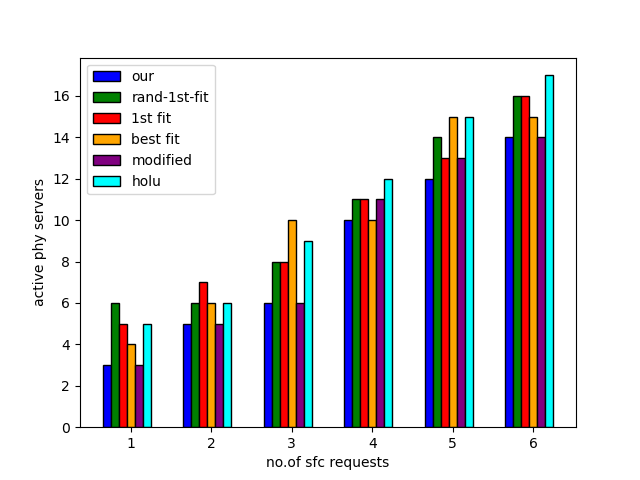

<IPython.core.display.Javascript object>


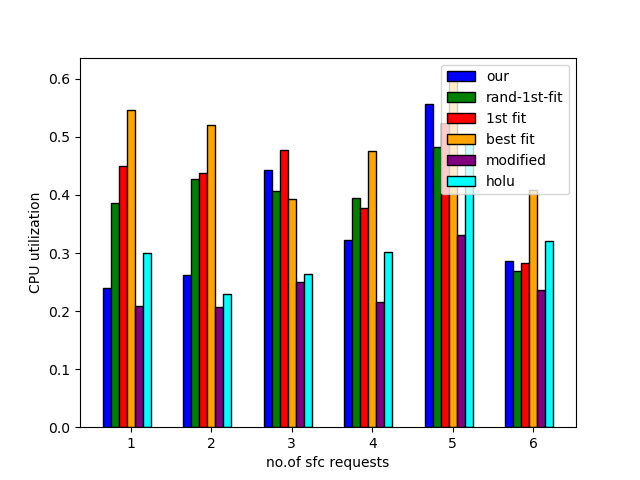

<IPython.core.display.Javascript object>


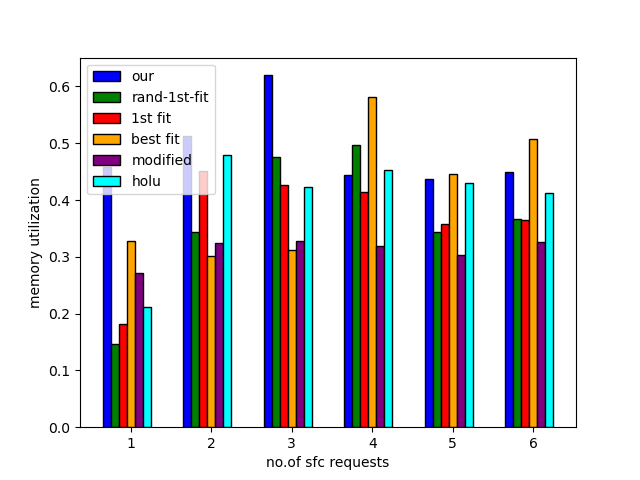

<IPython.core.display.Javascript object>


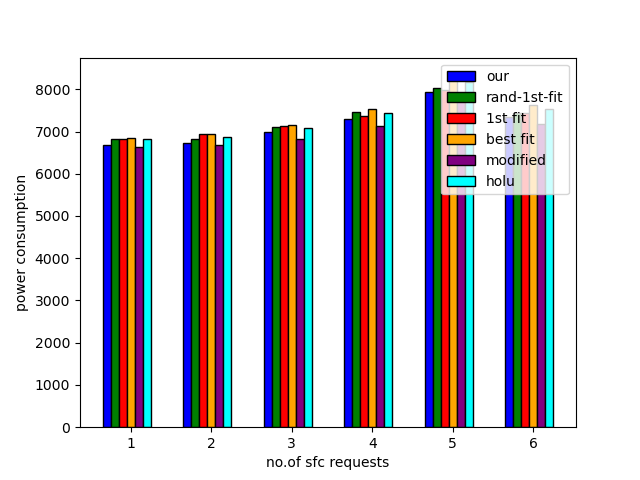

<IPython.core.display.Javascript object>


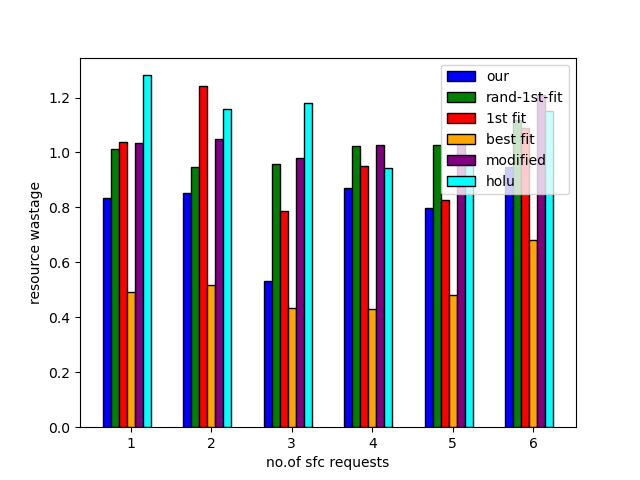

<IPython.core.display.Javascript object>


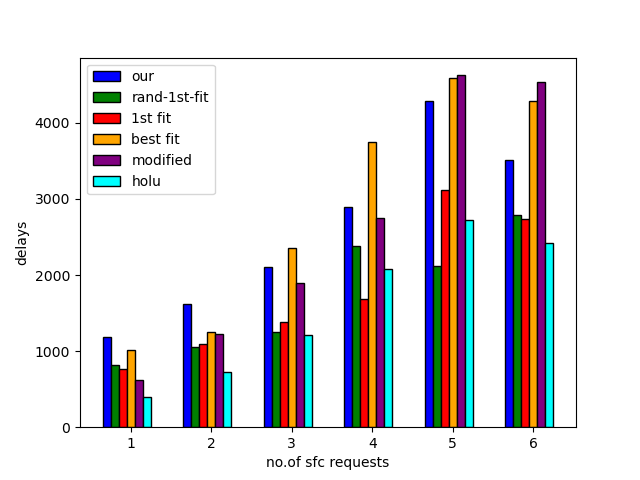

In [32]:

import numpy as np
import matplotlib.pyplot as plt3

Women = [115, 215, 250, 200]
Men = [114, 230, 510, 370]
  
w=5
r = np.arange(6)
width = 0.1
plot2=plt3.figure(2)
plt3.bar(r, a1, color = 'blue',
        width = width, edgecolor = 'black',
        label='our')
plt3.bar(r + width, a2, color = 'green',
        width = width, edgecolor = 'black',
        label='rand-1st-fit')
plt3.bar(r + 2*width, a3, color = 'red',
        width = width, edgecolor = 'black',
        label='1st fit')
plt3.bar(r + 3*width, a4, color = 'orange',
        width = width, edgecolor = 'black',
        label='best fit')
plt3.bar(r + 4*width, a5, color = 'purple',
        width = width, edgecolor = 'black',
        label='modified')
plt3.bar(r + 5*width, a6, color = 'cyan',
        width = width, edgecolor = 'black',
        label='holu')

plt3.xlabel("no.of sfc requests")
plt3.ylabel("active phy servers")
#plt3.title("Number of people voted in each year")
  
# plt.grid(linestyle='--')
plt3.xticks(r + width*3,['1','2','3','4','5','6'])

plt3.legend()
plt3.plot()
plot3=plt3.figure(3)  
plt3.bar(r, c1, color = 'blue',
        width = width, edgecolor = 'black',
        label='our')
plt3.bar(r + width, c2, color = 'green',
        width = width, edgecolor = 'black',
        label='rand-1st-fit')
plt3.bar(r + 2*width, c3, color = 'red',
        width = width, edgecolor = 'black',
        label='1st fit')
plt3.bar(r + 3*width, c4, color = 'orange',
        width = width, edgecolor = 'black',
        label='best fit')
plt3.bar(r + 4*width, c5, color = 'purple',
        width = width, edgecolor = 'black',
        label='modified')
plt3.bar(r + 5*width, c6, color = 'cyan',
        width = width, edgecolor = 'black',
        label='holu')

plt3.xlabel("no.of sfc requests")
plt3.ylabel("CPU utilization")  
# plt.grid(linestyle='--')
plt3.xticks(r + width*3,['1','2','3','4','5','6'])
plt3.legend()
plt3.plot()
#plt3.legend()
plot4=plt3.figure(4)  
  
plt3.bar(r, m1, color = 'blue',
        width = width, edgecolor = 'black',
        label='our')
plt3.bar(r + width, m2, color = 'green',
        width = width, edgecolor = 'black',
        label='rand-1st-fit')
plt3.bar(r + 2*width, m3, color = 'red',
        width = width, edgecolor = 'black',
        label='1st fit')
plt3.bar(r + 3*width, m4, color = 'orange',
        width = width, edgecolor = 'black',
        label='best fit')
plt3.bar(r + 4*width, m5, color = 'purple',
        width = width, edgecolor = 'black',
        label='modified')
plt3.bar(r + 5*width, m6, color = 'cyan',
        width = width, edgecolor = 'black',
        label='holu')

plt3.xlabel("no.of sfc requests")
plt3.ylabel("memory utilization")  
  
# plt.grid(linestyle='--')
plt3.xticks(r + width*3,['1','2','3','4','5','6'])
plt3.legend()
plt3.plot()
plot5=plt3.figure(5)  
  
plt3.bar(r, p1, color = 'blue',
        width = width, edgecolor = 'black',
        label='our')
plt3.bar(r + width, p2, color = 'green',
        width = width, edgecolor = 'black',
        label='rand-1st-fit')
plt3.bar(r + 2*width, p3, color = 'red',
        width = width, edgecolor = 'black',
        label='1st fit')
plt3.bar(r + 3*width, p4, color = 'orange',
        width = width, edgecolor = 'black',
        label='best fit')
plt3.bar(r + 4*width, p5, color = 'purple',
        width = width, edgecolor = 'black',
        label='modified')
plt3.bar(r + 5*width, p6, color = 'cyan',
        width = width, edgecolor = 'black',
        label='holu')

plt3.xlabel("no.of sfc requests")
plt3.ylabel("power consumption")  
  
# plt.grid(linestyle='--')
plt3.xticks(r + width*3,['1','2','3','4','5','6'])
plt3.legend()
plt3.plot()
plot6=plt3.figure(6)  
  
plt3.bar(r, r1, color = 'blue',
        width = width, edgecolor = 'black',
        label='our')
plt3.bar(r + width, r2, color = 'green',
        width = width, edgecolor = 'black',
        label='rand-1st-fit')
plt3.bar(r + 2*width, r3, color = 'red',
        width = width, edgecolor = 'black',
        label='1st fit')
plt3.bar(r + 3*width, r4, color = 'orange',
        width = width, edgecolor = 'black',
        label='best fit')
plt3.bar(r + 4*width, r5, color = 'purple',
        width = width, edgecolor = 'black',
        label='modified')
plt3.bar(r + 5*width, r6, color = 'cyan',
        width = width, edgecolor = 'black',
        label='holu')

plt3.xlabel("no.of sfc requests")
plt3.ylabel("resource wastage")  
  
# plt.grid(linestyle='--')
plt3.xticks(r + width*3,['1','2','3','4','5','6'])
plt3.legend()
plt3.plot()
plot7=plt3.figure(7)  
  
plt3.bar(r, d1, color = 'blue',
        width = width, edgecolor = 'black',
        label='our')
plt3.bar(r + width, d2, color = 'green',
        width = width, edgecolor = 'black',
        label='rand-1st-fit')
plt3.bar(r + 2*width, d3, color = 'red',
        width = width, edgecolor = 'black',
        label='1st fit')
plt3.bar(r + 3*width, d4, color = 'orange',
        width = width, edgecolor = 'black',
        label='best fit')
plt3.bar(r + 4*width, d5, color = 'purple',
        width = width, edgecolor = 'black',
        label='modified')
plt3.bar(r + 5*width, d6, color = 'cyan',
        width = width, edgecolor = 'black',
        label='holu')

plt3.xlabel("no.of sfc requests")
plt3.ylabel("delays")  
  
# plt.grid(linestyle='--')
plt3.xticks(r + width*3,['1','2','3','4','5','6'])
plt3.legend()
plt3.plot()
plt3.show()

In [2]:
def addEdge(n,m):
    i=0
    l=[j for j in range(n)]
    print(n,m)
    while(i<m):
        if len(l)!=1:
            a=random.choice(l)
            l.remove(a)
            b=random.choice(l)
            if a>b:
                a,b=b,a
        else:
            a=random.randrange(n-1)
            b=random.choice([j for j in range(n) if j>a])
        x='P'+str(a)
        y='P'+str(b)
        dis=random.choice([j for j in range(200,400)])
        temp = [x, y,dis]
        
        if temp[0:2] not in [j[0:2] for j in visual]:
            visual.append(temp)
            i=i+1
    